## Data preparation

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

In [24]:
df = pd.read_csv('df-merged-v2.csv')
columns = ['num_trips', 'latitude', 'longitude',  'delay_minutes']
df = df[columns]
df.head(3)

,num_trips,latitude,longitude,delay_minutes
0,39,49.42045,7.613668,49
1,38,49.42045,7.613668,74
2,27,49.42045,7.613668,33


## K-Means Clustering

In [25]:
# Convert DataFrame to matrix
matr = df.values
# Using sklearn
km = KMeans(n_clusters=5)
km.fit(matr)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([df.index,labels]).T
results

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
698163,698163,0
698164,698164,0
698165,698165,0
698166,698166,0


In [46]:
results = pd.merge(df, results.iloc[:, 1], left_index=True, right_index=True)
results = results.rename(columns={1: "cluster"})
results

,num_trips,latitude,longitude,delay_minutes,cluster
0,39,49.420450,7.613668,49,0
1,38,49.420450,7.613668,74,0
2,27,49.420450,7.613668,33,0
3,53,49.420450,7.613668,85,0
4,39,49.420450,7.613668,38,0
...,...,...,...,...,...
698163,12,51.538476,7.395210,0,0
698164,10,48.665453,12.598961,14,0
698165,10,51.499080,12.421535,0,0
698166,14,51.013900,13.808676,2,0


## Parallel Coordinates Plot

<AxesSubplot:>

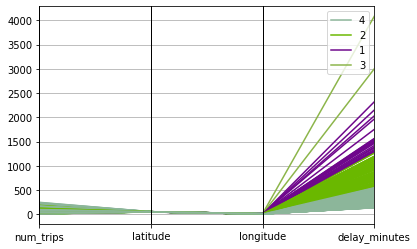

In [78]:
df1 = shuffle(results[results['cluster'] != 0])
pd.plotting.parallel_coordinates(df1.iloc[0:500, :], 'cluster')